# **Introducción al análisis de datos en Python** 
#### Profesor: Lucas Gómez Tobón

## Clase 3. Pandas
Una de las habilidades más relevantes para un Data Analyst o un Data Scientist es el manejo de datos estructurados. En este tutorial aprenderá cómo importar archivos a Python para crear `DataFrames` y de esta forma manipularlos para que estos queden en el formato más conveniente para su análisis.

### ¿Cuántos sobres debemos comprar para llenar el album de Panini?
Antes de comenzar con `pandas` y los `DataFrames`, vamos a retomar el ejercicio de simulación de la clase pasada.

Supongamos lo siguiente:
- El album tiene 638 monas/laminitas.
- Todas las monas son igual de probables de encontrarse en los sobres.
- Un sobre puede tener monas/laminitas repetidas.
- Cada sobre trae 5 monas/laminas.
- No es posible intercambiar monas con otras personas.

Para responder esta pregunta podríamos tomar un camino [analítico](http://www.unige.ch/math/folks/velenik/Vulg/Paninimania.pdf) o de simulación computacional. En este caso, tomaremos el último.

Primero creemos una función que cree un album de panini vacío. En este mundo abstracto, representamos un album como la lista de espacios vacías que nos faltan por llenar.



In [1]:
import numpy as np

In [2]:
def estrenar_album(n = 638):
    # n es el número de monas/laminitas que tiene el album
    album = [i for i in range(1, n + 1)]
    return album

In [3]:
album_i = estrenar_album()
album_i

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

Ahora vamos a crear una función que sea abrir un sobre de monas/laminitas

In [4]:
def abrir_sobre(n = 638):
    return np.random.randint(1, n + 1, size=5)

In [5]:
sobre_j = abrir_sobre()
sobre_j

array([320, 428, 446, 461, 516])

Ahora definamos una función que sea pegar las monas/laminitas de nuestro paquete en nuestro album.

In [6]:
# Forma larga
def pegar_monas(album, monas):
    for mona in monas: 
            if mona in album:
                album.remove(mona)
    return(album)

In [7]:
# Forma gomela
def pegar_monas(album, monas):
    album = [j for j in album if j not in monas]
    return(album)

In [8]:
# A modo de ejemplo, peguemos la mona 1

# Primero veamos las primeras 5 monas que nos faltan pegar
album_i[0:5]

[1, 2, 3, 4, 5]

In [9]:
# Peguemos la mona 1 veamos que sucede
album_i = pegar_monas(album = album_i, monas = [1])
album_i[0:5]

[2, 3, 4, 5, 6]

In [10]:
# Cuántas monas me faltan antes de pegar las laminas?
len(album_i)

637

In [11]:
album_i = pegar_monas(album = album_i, monas = sobre_j)

In [12]:
# Cuántas monas me faltan después de pegar las laminas?
len(album_i)

632

Ahora tenemos todo para crear la simulación. Creemos una que consista en saber cuántos sobres necesitamos para llenar un album

In [13]:
# Definimos condiciones iniciales
album_i = estrenar_album()
n_sobres = 0

# Vamos a abrir sobres hasta que llenemos el album
while len(album_i) > 0:
    # Simulamos abrir un sobre
    sobre_j = abrir_sobre()
    # Simulamos pegar las laminas en el sobre
    album_i = pegar_monas(album = album_i, monas = sobre_j)
    # Llevamos el conteo de cuántos sobres llevamos
    n_sobres += 1    

# Tenemos que abrir
n_sobres

876

Note que este valor cambia cada vez que corremos el código. Esto se da porque este proceso es aleatorio. Simulemos el proceso muchas veces para ver la distribución de nuestra variable objetivo y calculemos algunas probabilidades.

In [14]:
# Importamos el paquete tqdm para ver el progreso de nuestro loop
from tqdm import tqdm

In [15]:
n_simulaciones = 1000

simulaciones = []
for s in tqdm(range(n_simulaciones)):
    # Definimos condiciones iniciales
    n_sobres = 0
    album_i = estrenar_album()
    # Vamos a abrir sobres hasta que llenemos el album
    while len(album_i) > 0:
        # Simulamos abrir un sobre
        sobre_j = abrir_sobre()
        # Simulamos pegar las laminas en el sobre
        album_i = pegar_monas(album = album_i, monas = sobre_j)
        # Llevamos el conteo de cuántos sobres llevamos
        n_sobres += 1  
    simulaciones.append(n_sobres)

100%|██████████| 1000/1000 [04:27<00:00,  3.74it/s]


Veamos la distribución de la cantidad de sobres necesarios para llenar el album. En próximas clases entraremos más en el detalle de como construir gráficas, por el momento no se preocupe mucho por el siguiente código.

In [16]:
len(simulaciones)

1000

In [17]:
simulaciones[0:5]

[782, 948, 893, 947, 781]

Text(0, 0.5, 'Cantidad')

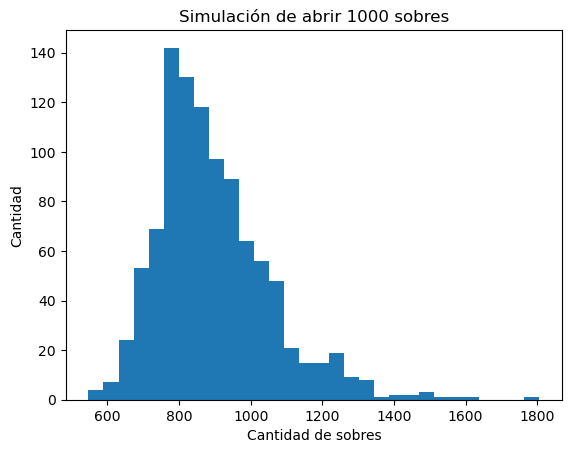

In [18]:
import matplotlib.pyplot as plt

plt.hist(simulaciones, bins = 30)
plt.title('Simulación de abrir 1000 sobres', size = 12)
plt.xlabel('Cantidad de sobres')
plt.ylabel('Cantidad')

Ahora calculemos algunas estadísticas descriptivas

In [19]:
# En el mejor de los casos, mega improbable, se puede llenar el album con
np.min(simulaciones)

547

In [20]:
# En promedio se necesita abrir 908 sobres para llenar el album
np.mean(simulaciones)

894.655

In [21]:
# El peor escenario es
np.max(simulaciones)

1806

In [22]:
# La desviación estándar es 161 sobres
np.std(simulaciones)

159.14055414946878

In [23]:
# Construyamos algunos intervalos de confianza en donde capturemos el 95% de los escenarios
ic_inferior95 = np.percentile(simulaciones, 2.5)
ic_superior95 = np.percentile(simulaciones, 97.5)
ic_inferior50 = np.percentile(simulaciones, 25)
ic_superior50 = np.percentile(simulaciones, 75)

In [24]:
print("Con un 95% de confianza podemos decir que se necesitan abrir entre", np.round(ic_inferior95), 
      "y", np.round(ic_superior95), "sobres para llenar el album")

Con un 95% de confianza podemos decir que se necesitan abrir entre 660.0 y 1280.0 sobres para llenar el album


In [25]:
print("Tenemos un 50% de probabilidad de que tengamos que abrir al rededor de", np.median(simulaciones), "sobres para llenar el album")

Tenemos un 50% de probabilidad de que tengamos que abrir al rededor de 866.0 sobres para llenar el album


Todo esto lo podemos visualizar mejor en una curva de probabilidad acumulada.

In [26]:
# empirical Cumulative Distribution Function
def ecdf(simulaciones):
    # Número de simulaciones
    n = len(simulaciones)

    # Ordenamos las simulaciones de menos sobres a mayor cantidad de sobres
    x = np.sort(simulaciones)

    # Calculamos probabilidades
    y = []
    for i in x:
        y_i = np.mean([j < i for j in x])
        y.append(y_i)
    y = np.array(y)
    
    return x, y

In [27]:
x_norm, y_norm = ecdf(simulaciones)

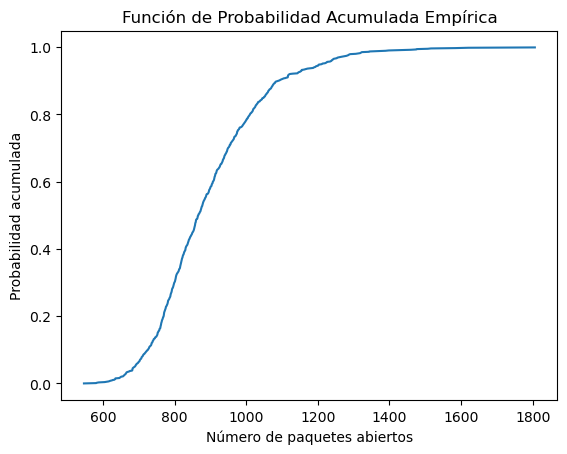

In [28]:
plt.plot(x_norm, y_norm)
plt.title('Función de Probabilidad Acumulada Empírica', size = 12);
plt.xlabel('Número de paquetes abiertos');
plt.ylabel('Probabilidad acumulada');

## ¿Qué es Pandas?
Pandas es una librería de código abierto para Python que proporciona herramientas de análisis de datos de alto rendimiento y fáciles de usar. Está construida sobre la biblioteca NumPy y proporciona estructuras de datos de alto nivel para trabajar con datos estructurados y tabulares, como hojas de cálculo y bases de datos relacionales.

Algunas de las características más importantes de Pandas son:

- Ofrece estructuras de datos para trabajar con datos tabulares, como el DataFrame y la Serie.
- roporciona herramientas para la lectura y escritura de datos desde y hacia una variedad de formatos de archivo, como CSV, Excel, SQL, entre otros.
- Permite realizar operaciones de limpieza y preprocesamiento de datos, como la eliminación de valores perdidos o la normalización de datos.
- Ofrece una amplia variedad de métodos para el análisis de datos, como el agrupamiento, la agregación, la selección y el filtrado de datos.
- Permite la visualización de datos con la integración con otras bibliotecas de Python, como Matplotlib.

Pandas es ampliamente utilizado en ciencia de datos, finanzas, ingeniería y otras disciplinas que requieren la manipulación y el análisis de grandes conjuntos de datos. Es una de las herramientas más populares en Python para el análisis de datos debido a su facilidad de uso y su amplia gama de funciones.

En el siguiente diagrama se puede ver la estructura general de un `dataframe`, es muy similar a un Excel pero solo con una hoja. En este caso las filas representan observaciones y las columnas representan variables.

<center>
<img src="img/dataframe.png" alt="dataframe" width="500" height="300">
</center>

Comenzaremos nuestra introducción a `Pandas` creando nuestro primer `dataframe` con un diccionario.

In [321]:
# Primero carguemos la librería
import pandas as pd

In [322]:
# Revisemos la versión de pandas de este tutorial
pd.__version__

'1.4.4'

In [323]:
# Cada variable de nuestro dataframe partirá de una lista
nombres = ["Jose", "Sebastian", "Hamadys", "Carlos", "Julian", "Juan"]
sexo = ["M", "M", "F", "M", "M", None]
edad = [24, 25, 32, 45, 52, 20]
peso = [75, 80, 60, 86, 72, 70]

In [324]:
# Creamos un diccionario con toda la información
un_diccionario = {
    "names": nombres,
    "sex": sexo,
    "age": edad,
    "weight": peso
}

In [325]:
un_diccionario

{'names': ['Jose', 'Sebastian', 'Hamadys', 'Carlos', 'Julian', 'Juan'],
 'sex': ['M', 'M', 'F', 'M', 'M', None],
 'age': [24, 25, 32, 45, 52, 20],
 'weight': [75, 80, 60, 86, 72, 70]}

In [326]:
# Construimos nuestro primer dataframe
data = pd.DataFrame(un_diccionario)

In [327]:
# Visualizamos nuestro dataframe
data

,names,sex,age,weight
0,Jose,M,24,75
1,Sebastian,M,25,80
2,Hamadys,F,32,60
3,Carlos,M,45,86
4,Julian,M,52,72
5,Juan,None,20,70


El `dataframe` es un objeto en Python que tiene unos atributos especiales. Estos atributos nos sirven para estudiar las características de nuestro objeto. Los principales se listan a continuación: 

- `.index`: es una propiedad que devuelve una lista con los nombres de fila del dataframe.

- `.columns`: es una propiedad que devuelve una lista con los nombres de las columnas del dataframe.

- `.shape`: es una propiedad que devuelve una tupla que indica el número de filas y columnas en el dataframe. Por ejemplo, un dataframe con 100 filas y 5 columnas tendría una forma de (100, 5).

- `.size`: es una propiedad que devuelve la cantidad de datos o celdas del dataframe. Por ejemplo, un dataframe con 100 filas y 5 columnas tendría un `size` de $100\times5=500$.

- `.count()`: este método cuenta la cantidad de valores no nulos por columna o fila.

- `.values`: es una propiedad que devuelve un array NumPy que contiene los valores del dataframe.

- `.T`: es un atributo que devuelve la base traspuesta.

- `.dtypes`: es una propiedad que devuelve un objeto que describe los tipos de datos de cada columna.

- `.head(n)`: es un método que devuelve las primeras n filas del dataframe.

- `.tail(n)`: es un método que devuelve las últimas n filas del dataframe.

- `.info()`: es un método que muestra información sobre el dataframe, incluyendo su forma, los tipos de datos de cada columna y la cantidad de valores no nulos.

- `.describe()`: es un método que muestra estadísticas descriptivas sobre el dataframe, incluyendo la media, la mediana, la desviación estándar, etc.

A continuación estudiaremos a detalle cada uno de estos métodos y atributos.


In [328]:
# .index Estudiamos los nombres del índice
data.index

RangeIndex(start=0, stop=6, step=1)

In [329]:
# .columns ¿Cuáles son los nombres de las columnas?
data.columns

Index(['names', 'sex', 'age', 'weight'], dtype='object')

In [330]:
# .shape ¿Cuáles son las dimensiones del dataframe?
data.shape

(6, 4)

In [331]:
# .size ¿Cuántos datos tengo?
data.size

24

In [332]:
# .count() ¿Cuántos datos no nulos tengo por columna?
data.count()

names     6
sex       5
age       6
weight    6
dtype: int64

In [333]:
# .count() ¿Cuántos datos no nulos tengo por fila/observación/individuo?
data.count(axis = 1)

0    4
1    4
2    4
3    4
4    4
5    3
dtype: int64

In [334]:
# axis = 0 calcula las funciones por columna. Esta es la opción por default
# axis = 1 calcula las funciones por fila
data.count(axis = 0)

names     6
sex       5
age       6
weight    6
dtype: int64

In [335]:
# .values Convierte el dataframe en un np.array de dos dimensiones
data.values

array([['Jose', 'M', 24, 75],
       ['Sebastian', 'M', 25, 80],
       ['Hamadys', 'F', 32, 60],
       ['Carlos', 'M', 45, 86],
       ['Julian', 'M', 52, 72],
       ['Juan', None, 20, 70]], dtype=object)

In [336]:
# .T Trasponer
data.T

,0,1,2,3,4,5
names,Jose,Sebastian,Hamadys,Carlos,Julian,Juan
sex,M,M,F,M,M,None
age,24,25,32,45,52,20
weight,75,80,60,86,72,70


In [337]:
data.T.index

Index(['names', 'sex', 'age', 'weight'], dtype='object')

In [338]:
data.T.columns

RangeIndex(start=0, stop=6, step=1)

In [339]:
# .dtypes ¿Cuál es el tipo de cada variable?
data.dtypes

names     object
sex       object
age        int64
weight     int64
dtype: object

In [340]:
# .head() por defecto entrega las primeras 5 filas
data.head()

,names,sex,age,weight
0,Jose,M,24,75
1,Sebastian,M,25,80
2,Hamadys,F,32,60
3,Carlos,M,45,86
4,Julian,M,52,72


In [341]:
# Primera fila
data.head(1)

,names,sex,age,weight
0,Jose,M,24,75


In [342]:
# Primeras dos filas
data.head(2)

,names,sex,age,weight
0,Jose,M,24,75
1,Sebastian,M,25,80


In [343]:
# .tail() Por defecto devuelve las últimas 5 filas
data.tail()

,names,sex,age,weight
1,Sebastian,M,25,80
2,Hamadys,F,32,60
3,Carlos,M,45,86
4,Julian,M,52,72
5,Juan,None,20,70


In [344]:
# Última fila
data.tail(1)

,names,sex,age,weight
5,Juan,None,20,70


In [345]:
# Últimas dos filas
data.tail(2)

,names,sex,age,weight
4,Julian,M,52,72
5,Juan,None,20,70


In [346]:
# .info() descripción general de la estructura de la base
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   6 non-null      object
 1   sex     5 non-null      object
 2   age     6 non-null      int64 
 3   weight  6 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes


In [347]:
# .describe() Estadísticas descriptivas de la data
data.describe()

,age,weight
count,6.000000,6.000000
mean,33.000000,73.833333
std,12.806248,8.908797
min,20.000000,60.000000
25%,24.250000,70.500000
50%,28.500000,73.500000
75%,41.750000,78.750000
max,52.000000,86.000000


In [348]:
data.describe(include = "object")

,names,sex
count,6,5
unique,6,2
top,Jose,M
freq,1,4


In [349]:
data.describe(include = "all")

,names,sex,age,weight
count,6,5,6.000000,6.000000
unique,6,2,NaN,NaN
top,Jose,M,NaN,NaN
freq,1,4,NaN,NaN
mean,NaN,NaN,33.000000,73.833333
std,NaN,NaN,12.806248,8.908797
min,NaN,NaN,20.000000,60.000000
25%,NaN,NaN,24.250000,70.500000
50%,NaN,NaN,28.500000,73.500000
75%,NaN,NaN,41.750000,78.750000


### Indexación y ejes
Adicionalmente, para manipular los dataframes es importante aprender como extraer fracciones de nuestra información. A esto se le conoce generalmente como *slicing*. En esta sección aprenderemos a filtrar la data por columnas y por filas. Los métodos que veremos serán.

- `[{nombre de la columna}]` y `.{nombre de la columna}`: Extracción de columnas.

- `set_index()`: Convertir una columna como índice.

- `.loc[]`: es un método para acceder a filas y columnas del dataframe por etiquetas de fila y columna.

- `.iloc[]`: es un método para acceder a filas y columnas del dataframe por índice entero.

- `.groupby()`: es un método para agrupar los datos por una o más columnas y realizar cálculos sobre los grupos resultantes.

- `.reset_index()`: Reiniciar el índice para que sea una enumeración de las filas.

- `.sort_values()`: Re-ordenar las filas.

- `.rename()`: Cambiarle el nombre a una fila o una columna.

- `.unique()`: Devuelve los valores únicos de la columna.

- `.value_counts()`: Cuenta la cantidad de valores únicos por columna.


**Extraer columnas**

Para extraer columnas tenemos dos métodos.
1. El primero consiste escribir entre corchetes cuadrados (`[]`) el nombre de la columna que se desea extraer entre comillas. Este método también permite extraer más de una columnas. Si ese es el caso, se pondría entre los corchetes cuadrados una lista con los nombres de las columnas deseadas entre comillas y separadas por comas.
2. El segundo método consiste en poner el nombre de la columna que se quiere extraer después de un punto `.`. Este método solo sirve si el nombre no está separado por espacios o caracteres especiales. 

In [350]:
# Método 1
data["names"]

0         Jose
1    Sebastian
2      Hamadys
3       Carlos
4       Julian
5         Juan
Name: names, dtype: object

In [351]:
# Método 1
data[["names", "weight"]]

,names,weight
0,Jose,75
1,Sebastian,80
2,Hamadys,60
3,Carlos,86
4,Julian,72
5,Juan,70


In [352]:
columnas_deseadas = ["names", "weight"]
data[columnas_deseadas]

,names,weight
0,Jose,75
1,Sebastian,80
2,Hamadys,60
3,Carlos,86
4,Julian,72
5,Juan,70


In [353]:
# Método 2
data.names

0         Jose
1    Sebastian
2      Hamadys
3       Carlos
4       Julian
5         Juan
Name: names, dtype: object

In [354]:
# Convertir una columna como un índice
data.set_index('names')

,sex,age,weight
names,,,
Jose,M,24,75
Sebastian,M,25,80
Hamadys,F,32,60
Carlos,M,45,86
Julian,M,52,72
Juan,None,20,70


In [355]:
# Si no sobreescribimos el objeto, no se guardan los cambios
data 

,names,sex,age,weight
0,Jose,M,24,75
1,Sebastian,M,25,80
2,Hamadys,F,32,60
3,Carlos,M,45,86
4,Julian,M,52,72
5,Juan,None,20,70


In [356]:
# Si no sobreescribimos el objeto, no se guardan los cambios
data = data.set_index('names')
data

,sex,age,weight
names,,,
Jose,M,24,75
Sebastian,M,25,80
Hamadys,F,32,60
Carlos,M,45,86
Julian,M,52,72
Juan,None,20,70


In [357]:
# Otra forma de sobreescribir el objeto sin necesidad de asignarlo es usando el argumento inplace = True, dentro
# de las funciones de Pandas
data.set_index("sex", append = True, inplace = True)
data

,,age,weight
names,sex,,
Jose,M,24,75
Sebastian,M,25,80
Hamadys,F,32,60
Carlos,M,45,86
Julian,M,52,72
Juan,NaN,20,70


In [358]:
# Para resetar el índice usamos .reset_index()
data.reset_index(inplace = True)
data

,names,sex,age,weight
0,Jose,M,24,75
1,Sebastian,M,25,80
2,Hamadys,F,32,60
3,Carlos,M,45,86
4,Julian,M,52,72
5,Juan,NaN,20,70


In [359]:
# Vuelva names el índice
data.set_index("names", inplace = True)

In [360]:
data

,sex,age,weight
names,,,
Jose,M,24,75
Sebastian,M,25,80
Hamadys,F,32,60
Carlos,M,45,86
Julian,M,52,72
Juan,NaN,20,70


In [361]:
# Ordene por edad de menor a mayor. No guarde el valor
data.sort_values('age')

,sex,age,weight
names,,,
Juan,NaN,20,70
Jose,M,24,75
Sebastian,M,25,80
Hamadys,F,32,60
Carlos,M,45,86
Julian,M,52,72


In [362]:
# Ordene por edad de mayor a menor. No guarde el valor
data.sort_values('age', ascending = False)

# Note que los índices se movieron!

,sex,age,weight
names,,,
Julian,M,52,72
Carlos,M,45,86
Hamadys,F,32,60
Sebastian,M,25,80
Jose,M,24,75
Juan,NaN,20,70


In [363]:
# Cambie el nombre de la columna sex a sexo
data.rename(columns = {"sex": "sexo"})

,sexo,age,weight
names,,,
Jose,M,24,75
Sebastian,M,25,80
Hamadys,F,32,60
Carlos,M,45,86
Julian,M,52,72
Juan,NaN,20,70


In [364]:
# Valores únicos de la columna sexo
data["sex"].unique()

array(['M', 'F', nan], dtype=object)

In [365]:
# ¿Cuántos hombres y mujeres tenemos?
data["sex"].value_counts()

M    4
F    1
Name: sex, dtype: int64

In [366]:
# Incluya los valores faltantes en el conteo
data["sex"].value_counts(dropna = False)

M      4
F      1
NaN    1
Name: sex, dtype: int64

In [367]:
# ¿Cuál es la proporción de hombres y mujeres tenemos?
data["sex"].value_counts(normalize = True)

M    0.8
F    0.2
Name: sex, dtype: float64

Los métodos `.iloc` y ``.loc`` son utilizados en Pandas para acceder a los datos de un dataframe de diferentes maneras.

`.iloc` se utiliza para acceder a los datos del dataframe mediante índices enteros. Permite seleccionar filas y columnas utilizando números enteros en lugar de etiquetas de fila y columna. La sintaxis general para utilizar `.iloc` es la siguiente:

```python
dataframe.iloc[filas, columnas]
```

Donde `filas` y `columnas` son listas o arrays de números enteros que indican las filas y columnas que se desean seleccionar, respectivamente.

<center>
<div>
<img src="img/iloc2.png" width="500"/>
</div>
</center>

Por ejemplo, para seleccionar las primeras 3 filas y las primeras 2 columnas de un dataframe, se puede utilizar el siguiente código:

```python 
dataframe.iloc[:3, :2]
```

Recuerde que la indexación en python empieza en 0. A continuación puede encontrar una referencia gráfica:
<center>
<img src="img/iloc1.png" alt="indexación" width="450" height="200">
</center>

Por otro lado, `.loc` se utiliza para acceder a los datos del dataframe mediante etiquetas de fila y columna. Permite seleccionar filas y columnas utilizando las etiquetas de fila y columna en lugar de índices enteros. La sintaxis general para utilizar `.loc` es la siguiente:

```python
dataframe.loc[filas, columnas]
```

Donde `filas` y `columnas` son listas o arrays de etiquetas de fila y columna que indican las filas y columnas que se desean seleccionar, respectivamente.

<center>
<div>
<img src="img/iloc3.png" width="500"/>
</div>
</center>

Por ejemplo, para seleccionar todas las filas donde la columna "age" es mayor o igual a 30, se puede utilizar el siguiente código:

```python
dataframe.loc[dataframe['age'] >= 30, :]
```

En resumen, `.iloc` se utiliza para acceder a los datos mediante índices enteros, mientras que `.loc` se utiliza para acceder a los datos mediante etiquetas de fila y columna. Ambos métodos son muy útiles para la selección y manipulación de datos en Pandas.

In [368]:
# Extraiga la fila de Hamadys usando .loc
data.loc['Hamadys', :]

sex        F
age       32
weight    60
Name: Hamadys, dtype: object

In [369]:
data.loc['Hamadys']

sex        F
age       32
weight    60
Name: Hamadys, dtype: object

In [370]:
# Extraiga la columna de edad usando .loc
data.loc[:,'age']

names
Jose         24
Sebastian    25
Hamadys      32
Carlos       45
Julian       52
Juan         20
Name: age, dtype: int64

In [371]:
# Extraiga los pesos de Juan y Carlos usando .loc
data.loc[['Juan', 'Carlos'], 'weight']

names
Juan      70
Carlos    86
Name: weight, dtype: int64

In [372]:
# Extraiga a todas las personas de sexo masculino mayores a 30 años
data.loc[(data['age'] > 30) & (data['sex'] == 'M'),]

,sex,age,weight
names,,,
Carlos,M,45,86
Julian,M,52,72


In [373]:
data.loc[(data['age'] > 30) & (data['sex'] == 'M')]

,sex,age,weight
names,,,
Carlos,M,45,86
Julian,M,52,72


In [374]:
# Extraiga la segunda fila usando .iloc
data.iloc[1]

sex        M
age       25
weight    80
Name: Sebastian, dtype: object

In [375]:
data.iloc[1,]

sex        M
age       25
weight    80
Name: Sebastian, dtype: object

In [376]:
# Extraiga la segunda y tercera columna usando .iloc
data.iloc[:,[1,2]]

,age,weight
names,,
Jose,24,75
Sebastian,25,80
Hamadys,32,60
Carlos,45,86
Julian,52,72
Juan,20,70


In [377]:
# Extraiga la primera y última fila y segunda columna usando .iloc
data.iloc[[0,-1],[1]]

,age
names,
Jose,24
Juan,20


In [378]:
# Reinicie el índice
data.reset_index(inplace = True, drop = False) 
data

,names,sex,age,weight
0,Jose,M,24,75
1,Sebastian,M,25,80
2,Hamadys,F,32,60
3,Carlos,M,45,86
4,Julian,M,52,72
5,Juan,NaN,20,70


### Modificación de valores
Las columnas dentro de un dataframe a su vez son un objeto. Estos se conocen como `Series` y son una estructura de datos unidimensional que contiene una secuencia de valores y una etiqueta de índice para cada uno de ellos. Se puede pensar en una serie como una columna en una hoja de cálculo o como un array unidimensional con etiquetas de índice.

Una serie de Pandas se puede crear a partir de una lista, un array NumPy, un diccionario o incluso otro objeto de serie. La etiqueta de índice por defecto para cada elemento de la serie es simplemente un rango de números enteros de 0 a n-1, donde n es el número de elementos en la serie. Sin embargo, se puede especificar etiquetas de índice personalizadas para cada elemento de la serie.

In [379]:
type(data["names"])

pandas.core.series.Series

Podemos comenzar editando valores o celdas particulares. Por ejemplo, el sexo de Juan está como nulo. Vamos a definirlo como masculino

In [380]:
data.loc[data.names == "Juan", "sex"]

5    NaN
Name: sex, dtype: object

In [381]:
data.loc[data.names == "Juan", "sex"] = "M"

In [382]:
data

,names,sex,age,weight
0,Jose,M,24,75
1,Sebastian,M,25,80
2,Hamadys,F,32,60
3,Carlos,M,45,86
4,Julian,M,52,72
5,Juan,M,20,70


Del mismo modo, también podemos editar columnas. Actualmente tenemos la edad en años, pasemosla a días.

In [383]:
data["age"] = data["age"]*365

In [384]:
data

,names,sex,age,weight
0,Jose,M,8760,75
1,Sebastian,M,9125,80
2,Hamadys,F,11680,60
3,Carlos,M,16425,86
4,Julian,M,18980,72
5,Juan,M,7300,70


También podemos crear una nueva variable

In [385]:
data["nueva_variable"] = np.nan

In [386]:
data

,names,sex,age,weight,nueva_variable
0,Jose,M,8760,75,NaN
1,Sebastian,M,9125,80,NaN
2,Hamadys,F,11680,60,NaN
3,Carlos,M,16425,86,NaN
4,Julian,M,18980,72,NaN
5,Juan,M,7300,70,NaN


Otro método para crear una nueva variable es usando el método `.assign()`

In [387]:
data = data.assign(nueva_variable2 = np.nan)
data

,names,sex,age,weight,nueva_variable,nueva_variable2
0,Jose,M,8760,75,NaN,NaN
1,Sebastian,M,9125,80,NaN,NaN
2,Hamadys,F,11680,60,NaN,NaN
3,Carlos,M,16425,86,NaN,NaN
4,Julian,M,18980,72,NaN,NaN
5,Juan,M,7300,70,NaN,NaN


El valor con el que se modifica cada variable no tiene que ser el mismo para todas.

In [388]:
apellido = ["Urrutia", "Carvajal", "Gómez", "Tobón", "Pardo", "López"]

In [389]:
data["names"] = data["names"] + " " + apellido

In [390]:
data

,names,sex,age,weight,nueva_variable,nueva_variable2
0,Jose Urrutia,M,8760,75,NaN,NaN
1,Sebastian Carvajal,M,9125,80,NaN,NaN
2,Hamadys Gómez,F,11680,60,NaN,NaN
3,Carlos Tobón,M,16425,86,NaN,NaN
4,Julian Pardo,M,18980,72,NaN,NaN
5,Juan López,M,7300,70,NaN,NaN


### Estadísticas descriptivas
Anteriormente pudimos ver como el método `.describe()` me daba un resumen de toda la base. Sin embargo, en esta sección veremos cada una de las principales funciones para sacar las estadísticas

In [391]:
# Suma de todas las columnas
data.sum()

names              Jose UrrutiaSebastian CarvajalHamadys GómezCar...
sex                                                           MMFMMM
age                                                            72270
weight                                                           443
nueva_variable                                                   0.0
nueva_variable2                                                  0.0
dtype: object

In [392]:
# Suma por fila
data.sum(axis = 1, numeric_only = True)

0     8835.0
1     9205.0
2    11740.0
3    16511.0
4    19052.0
5     7370.0
dtype: float64

In [393]:
# Suma de toda la columna peso
data["weight"].sum()

443

In [394]:
# Dato mínimo por columna
data.min()

names              Carlos Tobón
sex                           F
age                        7300
weight                       60
nueva_variable              NaN
nueva_variable2             NaN
dtype: object

In [395]:
# Dato máximo por columna
data.max()

names              Sebastian Carvajal
sex                                 M
age                             18980
weight                             86
nueva_variable                    NaN
nueva_variable2                   NaN
dtype: object

In [396]:
# ¿Cuál es el id de la persona que tiene la edad mínima?
data.age.idxmin()

5

In [397]:
# Juan López tiene la edad mínima
data.iloc[data.age.idxmin(),]

names              Juan López
sex                         M
age                      7300
weight                     70
nueva_variable            NaN
nueva_variable2           NaN
Name: 5, dtype: object

In [398]:
# ¿Cuál es el índice de la persona con mayor peso?
data.weight.idxmax()

3

In [399]:
data.loc[data.weight.idxmax(),]

names              Carlos Tobón
sex                           M
age                       16425
weight                       86
nueva_variable              NaN
nueva_variable2             NaN
Name: 3, dtype: object

In [400]:
# Media de las variables
data.mean(numeric_only = True)

age                12045.000000
weight                73.833333
nueva_variable              NaN
nueva_variable2             NaN
dtype: float64

In [401]:
# Datos medianos
data.median(numeric_only = True)

age                10402.5
weight                73.5
nueva_variable         NaN
nueva_variable2        NaN
dtype: float64

### Aplicar funciones a las columnas
En Pandas, el método `apply` se utiliza para aplicar una función a una serie o a un dataframe. El método `apply` toma como argumento una función y la aplica a cada elemento de la serie o del dataframe, devolviendo una nueva serie o dataframe con los resultados de la función aplicada a cada elemento.

La función que se aplica en el método `apply` puede ser una función lambda o una función definida por el usuario. Esta función debe tomar como argumento un elemento de la serie o dataframe y devolver el resultado de aplicar la función al elemento.

El método `apply` se puede aplicar de varias formas en un dataframe:

- Aplicar una función a una columna específica: Se puede utilizar el método `apply` en una columna específica de un dataframe utilizando la siguiente sintaxis:

```python
dataframe["nombre_columna"].apply(funcion)
```

Donde "nombre_columna" es el nombre de la columna en la que se desea aplicar la función y "funcion" es la función que se desea aplicar a cada elemento de la columna.

- Aplicar una función a un dataframe completo: Se puede utilizar el método `apply` en un dataframe completo utilizando la siguiente sintaxis:

```python
dataframe.apply(funcion)
```

Donde "funcion" es la función que se desea aplicar a cada elemento del dataframe.

- Aplicar una función a una fila específica: Se puede utilizar el método `apply` en una fila específica de un dataframe utilizando la siguiente sintaxis:

```python
dataframe.loc[etiqueta_fila].apply(funcion)
```

Donde "etiqueta_fila" es la etiqueta de la fila en la que se desea aplicar la función y "funcion" es la función que se desea aplicar a cada elemento de la fila.

- el método `apply` también puede ser utilizado con funciones **lambda**, que son funciones anónimas y pequeñas que se definen dentro de una línea de código. Por ejemplo, si se quisiera aplicar una función **lambda** que tome como entrada una cadena de caracteres y devuelva la versión en mayúsculas de la misma, se podría utilizar el método apply de la siguiente manera:

```python
dataframe['nombre_columna'].apply(lambda x: x.upper())
```

<center>
<div>
<img src="img/lambda.png" width="200"/>
</div>

<div>
<img src="img/lambda1.png" width="200"/>
</div>
</center>

El método `apply` también puede aplicarse a múltiples columnas o filas utilizando la opción axis. Si `axis=0`, la función se aplicará a cada columna del dataframe. Si `axis=1`, la función se aplicará a cada fila del dataframe.

En resumen, el método `apply` se utiliza en Pandas para aplicar una función a una serie o dataframe, y puede utilizarse de diferentes maneras para aplicar la función.



In [402]:
# Multiplicar x 2 todas las celdas
data.apply(lambda x: x*2)

,names,sex,age,weight,nueva_variable,nueva_variable2
0,Jose UrrutiaJose Urrutia,MM,17520,150,NaN,NaN
1,Sebastian CarvajalSebastian Carvajal,MM,18250,160,NaN,NaN
2,Hamadys GómezHamadys Gómez,FF,23360,120,NaN,NaN
3,Carlos TobónCarlos Tobón,MM,32850,172,NaN,NaN
4,Julian PardoJulian Pardo,MM,37960,144,NaN,NaN
5,Juan LópezJuan López,MM,14600,140,NaN,NaN


In [403]:
# Convertir la edad de días a años
data["age"].apply(lambda x: x/365)

0    24.0
1    25.0
2    32.0
3    45.0
4    52.0
5    20.0
Name: age, dtype: float64

### Eliminar filas y columnas

In [404]:
# Borre la fila identificada como 1
data.drop(1) 

,names,sex,age,weight,nueva_variable,nueva_variable2
0,Jose Urrutia,M,8760,75,NaN,NaN
2,Hamadys Gómez,F,11680,60,NaN,NaN
3,Carlos Tobón,M,16425,86,NaN,NaN
4,Julian Pardo,M,18980,72,NaN,NaN
5,Juan López,M,7300,70,NaN,NaN


In [405]:
# Borre la columna nueva_variable y nueva_variable2
data.drop(columns = ["nueva_variable", "nueva_variable2"], inplace = True) 

In [406]:
data

,names,sex,age,weight
0,Jose Urrutia,M,8760,75
1,Sebastian Carvajal,M,9125,80
2,Hamadys Gómez,F,11680,60
3,Carlos Tobón,M,16425,86
4,Julian Pardo,M,18980,72
5,Juan López,M,7300,70


In [407]:
# Creemos un valor faltante
data.loc[0, "names"] = np.nan

In [408]:
data

,names,sex,age,weight
0,NaN,M,8760,75
1,Sebastian Carvajal,M,9125,80
2,Hamadys Gómez,F,11680,60
3,Carlos Tobón,M,16425,86
4,Julian Pardo,M,18980,72
5,Juan López,M,7300,70


In [409]:
# Eliminamos las filas con valores faltantes
data.dropna()

,names,sex,age,weight
1,Sebastian Carvajal,M,9125,80
2,Hamadys Gómez,F,11680,60
3,Carlos Tobón,M,16425,86
4,Julian Pardo,M,18980,72
5,Juan López,M,7300,70


La función `pd.concat` en Pandas se utiliza para concatenar dos o más objetos de Pandas a lo largo de un eje específico. Los objetos de Pandas pueden ser dataframes o series. La concatenación implica unir los objetos uno al lado del otro o uno debajo del otro, dependiendo del eje especificado.

La sintaxis básica de `pd.concat` es la siguiente:
```python
pd.concat(objetos, axis = 0, join = 'outer', ignore_index = False)
```
Donde:

- `objetos`: es una lista o tupla de objetos de Pandas que se desea concatenar.
- `axis`: especifica el eje a lo largo del cual se realizará la concatenación. Si `axis=0`, se concatenarán los objetos uno debajo del otro (verticalmente). Si `axis=1`, se concatenarán los objetos uno al lado del otro (horizontalmente).
- `join`: especifica el tipo de unión que se desea realizar. Puede ser `'inner'` (intersección de los índices), `'outer'` (unión de los índices) o `'left'` (unión de los índices del objeto en el lado izquierdo).
- `ignore_index`: especifica si se deben ignorar los índices originales y crear nuevos índices. Si es `True`, se crearán nuevos índices.

La función `pd.concat` **es muy útil para combinar dataframes o series que tienen columnas o índices en común**. Por ejemplo, si se tienen dos dataframes que comparten las mismas columnas y se desea combinarlos verticalmente, se podría utilizar el siguiente código:

In [410]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df1

,A,B
0,1,3
1,2,4


In [411]:
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
df2

,A,B
0,5,7
1,6,8


In [412]:
nuevo_df = pd.concat([df1, df2], axis=0)
nuevo_df

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


En este caso, se utilizará `axis=0` para concatenar los dataframes verticalmente. Los índices de los dataframes originales se conservarán en el nuevo dataframe.

La función `pd.concat` también puede ser utilizada para combinar dataframes o series que no tienen columnas o índices en común. En este caso, las columnas o índices faltantes se rellenarán con valores nulos. Por ejemplo, si se quisiera combinar horizontalmente dos dataframes que tienen diferentes columnas, se podría utilizar el siguiente código:

In [413]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df1

,A,B
0,1,3
1,2,4


In [414]:
df2 = pd.DataFrame({'C': [5, 6], 'D': [7, 8]})
df2

,C,D
0,5,7
1,6,8


In [415]:
nuevo_df = pd.concat([df1, df2], axis=1)
nuevo_df

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


En este caso, se utilizará `axis=1` para concatenar los dataframes horizontalmente. Como los dataframes no tienen columnas en común, se crearán nuevas columnas con valores nulos.

En resumen, la función `pd.concat` en Pandas es una herramienta muy útil para combinar dataframes o series a lo largo de un eje específico. Se puede utilizar con diferentes parámetros para personalizar la unión de los objetos y crear un nuevo dataframe o serie.

In [416]:
# Creemos una nueva fila
nueva_fila = pd.DataFrame({"names": "Andrea Saldarriaga", "sex": "F", "age": 12000, "weight": 60}, index = [0])
data = pd.concat((data, nueva_fila), axis = 0)
data

,names,sex,age,weight
0,NaN,M,8760,75
1,Sebastian Carvajal,M,9125,80
2,Hamadys Gómez,F,11680,60
3,Carlos Tobón,M,16425,86
4,Julian Pardo,M,18980,72
5,Juan López,M,7300,70
0,Andrea Saldarriaga,F,12000,60


In [417]:
# Creemos una fila duplicada
data = pd.concat((data, data.iloc[1:2,]), axis = 0)

In [418]:
data

,names,sex,age,weight
0,NaN,M,8760,75
1,Sebastian Carvajal,M,9125,80
2,Hamadys Gómez,F,11680,60
3,Carlos Tobón,M,16425,86
4,Julian Pardo,M,18980,72
5,Juan López,M,7300,70
0,Andrea Saldarriaga,F,12000,60
1,Sebastian Carvajal,M,9125,80


In [419]:
# Eliminemos duplicados. Conserva la primera observación
data = data.drop_duplicates()
data

,names,sex,age,weight
0,NaN,M,8760,75
1,Sebastian Carvajal,M,9125,80
2,Hamadys Gómez,F,11680,60
3,Carlos Tobón,M,16425,86
4,Julian Pardo,M,18980,72
5,Juan López,M,7300,70
0,Andrea Saldarriaga,F,12000,60


### Importar datos

In [420]:
# ¿Cuál es mi directorio?
import os

os.getcwd()

'C:\\Users\\Lucas\\OneDrive - Universidad de los Andes\\Complementarias\\Proyectos de analítica en Python\\Introducción al análisis de datos en Python\\Clase 3\\Datos'

In [421]:
# Cambiar directorio
os.chdir(r"C:\Users\Lucas\OneDrive - Universidad de los Andes\Complementarias\Proyectos de analítica en Python\Introducción al análisis de datos en Python\Clase 3\Datos")

In [422]:
# ¿Qué archivos hay en esa carpeta?
os.listdir()

['encuesta_hogares1.csv',
 'encuesta_hogares2.csv',
 'info_accidentes.csv',
 'info_accidentes.xlsx']

In [423]:
# Importar csv
encuesta = pd.read_csv('encuesta_hogares1.csv')

In [424]:
encuesta.head()

,DIRECTORIO,HOGAR_NUMERO,PERSONA_NUMERO,edad,sexo
0,36228,1,2,53,2
1,36252,1,2,64,2
2,36281,1,2,88,2
3,36297,1,2,25,2
4,36313,1,1,66,2


### Ejercicios
Con base a lo aprendido anteriormente, respoda las siguientes preguntas sobre la base de datos `encuesta`:
1. ¿Cuantas observaciones tiene la base de datos?

2. ¿Qué columnas tiene?

3. Extraiga estadísticas descriptivas generales.

3. ¿Cuántos hombres y mujeres hay en la base?

4. ¿Cuántos hogares?

5. ¿Cuántos menores de edad?

### Ejercicios
1. Importe la base de datos "info_accidentes.csv".

2. Visualice las primeras 6 filas de la base

3. ¿Cuántos muertos hay registrados en la base de datos? 

4. ¿Cuántos heridos?

5. ¿Cuantos accidentes hubo en Santa Fe? ¿Cuántos muertos y cuántos heridos?

6. Explore la columna TipoTiempo, ¿cuál es la categoría en la que más ocurren accidentes?

### Unir bases de datos

In [464]:
# Borre el objeto encuesta
del encuesta 

In [466]:
encuesta1 = pd.read_csv('encuesta_hogares1.csv') 
encuesta2 = pd.read_csv('encuesta_hogares2.csv') 

In [467]:
encuesta1.head()

,DIRECTORIO,HOGAR_NUMERO,PERSONA_NUMERO,edad,sexo
0,36228,1,2,53,2
1,36252,1,2,64,2
2,36281,1,2,88,2
3,36297,1,2,25,2
4,36313,1,1,66,2


In [468]:
encuesta2.head()

,DIRECTORIO,HOGAR_NUMERO,PERSONA_NUMERO,edad,sexo
0,43678,1,1,40,2
1,43709,1,4,24,2
2,43721,1,1,42,1
3,43764,1,1,36,1
4,43908,1,1,48,1


In [469]:
# Pegar filas
encuesta = pd.concat([encuesta1, encuesta2], axis = 0)
encuesta

,DIRECTORIO,HOGAR_NUMERO,PERSONA_NUMERO,edad,sexo
0,36228,1,2,53,2
1,36252,1,2,64,2
2,36281,1,2,88,2
3,36297,1,2,25,2
4,36313,1,1,66,2
...,...,...,...,...,...
245,52877,1,1,28,1
246,52914,1,1,27,1
247,52920,1,1,37,1
248,52940,1,1,32,2


In [472]:
# Borre accidentes
del info_accidentes 

In [473]:
# importe la hoja parteA de info_accidentes.xlsx
accidentes1 = pd.read_excel('info_accidentes.xlsx', sheet_name = 'parteA') 
# importe la hoja parteB de info_accidentes.xlsx
accidentes2 = pd.read_excel('info_accidentes.xlsx', sheet_name = 'parteB') 

In [477]:
accidentes1.head()

,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,Direccion
0,01/13/2016 12:00:00 AM,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,KR 101-CL 83 02
1,2016-12-01 00:00:00,Con Heridos,Atropello,,,,,,0.0,0.0,CL 147-KR 7 02
2,01/13/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,CL 19-KR 5 SE 02
3,01/17/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,AC 80-KR 107 02
4,01/18/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,TR 14-CL 48 S 05


In [478]:
accidentes2.head()

,Fecha,Direccion,TipoVia1,NumeroVia1,LetraVia1,CardinalVia1,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Localidad,HoraOcurrencia,TipoDiseño,TipoTiempo,TotalMuertos,TotalHeridos
0,01/13/2016 12:00:00 AM,KR 101-CL 83 02,KR,101,,,CL,83.0,,,ENGATIVA,12/31/1899 10:30:00 PM,Interseccion,Normal,0,2
1,2016-12-01 00:00:00,CL 147-KR 7 02,CL,147,,,KR,7.0,,,USAQUEN,12/31/1899 03:40:00 PM,Interseccion,Normal,0,1
2,01/13/2016 12:00:00 AM,CL 19-KR 5 SE 02,CL,19,,S,KR,5.0,,E,SAN CRISTOBAL,12/31/1899 07:20:00 AM,Tramo de Via,Normal,0,0
3,01/17/2016 12:00:00 AM,AC 80-KR 107 02,AC,80,,,KR,107.0,,,ENGATIVA,12/31/1899 06:10:00 AM,Tramo de Via,Normal,0,0
4,01/18/2016 12:00:00 AM,TR 14-CL 48 S 05,TR,14,,,CL,48.0,,S,RAFAEL URIBE URIBE,12/31/1899 05:00:00 PM,Tramo de Via,Normal,0,0


In [476]:
# Convierta a strings las direcciones y fechas
accidentes1['Direccion'] = accidentes1['Direccion'].astype(str) 
accidentes1['Fecha'] = accidentes1['Fecha'].astype(str)
accidentes2['Direccion'] = accidentes2['Direccion'].astype(str)
accidentes2['Fecha'] = accidentes2['Fecha'].astype(str)

Existen cuatro formas básicas (universales) de unir (join) bases de datos.

<center>
<div>
<img src="img/merge.png" width="400"/>
</div>
</center>

Todas las formas de join se encuentran a continuación explicadas a detalle:

- Inner Join: Este tipo de join devuelve únicamente los registros que tienen coincidencias en ambas tablas. Es decir, los registros que tienen el mismo valor en la columna de unión. Si un registro de una de las tablas no tiene coincidencia en la otra tabla, no se mostrará en el resultado final.

- Left Join: En este tipo de join se muestran todos los registros de la tabla izquierda (la primera tabla que se especifica en la cláusula JOIN), junto con los registros que coinciden en la tabla derecha. Si no hay coincidencias en la tabla derecha, se rellena con valores nulos.

- Right Join: Similar al left join, pero muestra todos los registros de la tabla derecha y los registros que coinciden en la tabla izquierda.

- Outer Join/Full Join: Este tipo de join muestra todos los registros de ambas tablas, tanto los registros que coinciden como los que no coinciden. Si no hay coincidencias, se rellenan con valores nulos.

- Cross Join: También conocido como join cartesiano, este tipo de join combina cada registro de la tabla izquierda con cada registro de la tabla derecha. No se requiere una columna de unión.

En todos los tipos de join, la columna de unión es la que se utiliza para unir los registros de ambas tablas. Esta columna se especifica en la cláusula "on" en el .merge().

In [479]:
# Hace un inner join
accidentes = pd.merge(accidentes1, accidentes2, on = ['Direccion', 'Fecha'])

In [482]:
accidentes.head()

,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,...,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Localidad,HoraOcurrencia,TipoDiseño,TipoTiempo,TotalMuertos,TotalHeridos
0,01/13/2016 12:00:00 AM,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,...,CL,83.0,,,ENGATIVA,12/31/1899 10:30:00 PM,Interseccion,Normal,0,2
1,2016-12-01 00:00:00,Con Heridos,Atropello,,,,,,0.0,0.0,...,KR,7.0,,,USAQUEN,12/31/1899 03:40:00 PM,Interseccion,Normal,0,1
2,01/13/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,KR,5.0,,E,SAN CRISTOBAL,12/31/1899 07:20:00 AM,Tramo de Via,Normal,0,0
3,01/17/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,KR,107.0,,,ENGATIVA,12/31/1899 06:10:00 AM,Tramo de Via,Normal,0,0
4,01/18/2016 12:00:00 AM,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,CL,48.0,,S,RAFAEL URIBE URIBE,12/31/1899 05:00:00 PM,Tramo de Via,Normal,0,0


### Exportar bases de datos
1. [to_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html)
2. [to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)
3. [to_pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html)

In [ ]:
data.to_excel('../Datos/primer_data.xlsx', sheet_name = 'Prueba', index = False)

In [ ]:
data.to_csv('../Datos/primer_data.csv', sep = ';')

In [ ]:
data.to_pickle('../Datos/primer_data.gzip', compression = 'gzip')